In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import List


In [3]:
def percent_to_bucket(score: float, num_buckets=7) -> int:
    return int((score * 100) // (100 / num_buckets))


In [4]:
data = pd.read_csv('analysed_tweets/results_medium.csv')


In [5]:
def collect_buckets(scores: List[float]) -> List[int]:
    buckets = [0 for _ in range(7)]
    for score in scores:
        buckets[percent_to_bucket(score)] += 1
    return buckets


In [6]:
toxicity = collect_buckets(data['toxicity'])
severe_toxicity = collect_buckets(data['severe_toxicity'])
obscene = collect_buckets(data['obscene'])
identity_attack = collect_buckets(data['identity_attack'])
insult = collect_buckets(data['insult'])
threat = collect_buckets(data['threat'])
sexual_explicit = collect_buckets(data['sexual_explicit'])

bucket_ranges = [
    f"{round(1/7 * i * 100, 1)} - {round(1/7 * (i+1) * 100,1)}%" for i in range(7)]


In [7]:
def bar_chart_all():
    x = np.arange(len(bucket_ranges))  # the label locations
    width = 1 / 8  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - 3 * width, toxicity, width, label='toxicity')
    ax.bar(x - 2 * width, severe_toxicity, width, label='severe_toxicity')
    ax.bar(x - width, obscene, width, label='obscene')
    ax.bar(x, identity_attack, width, label='identity_attack')
    ax.bar(x + width, insult, width, label='insult')
    ax.bar(x + 2 * width, threat, width, label='threat')
    ax.bar(x + 3 * width, sexual_explicit, width, label='sexual_explicit')

    ax.set_ylabel('Count')
    ax.set_xlabel('Bucket')
    ax.set_title('Buckets per Category')
    ax.set_xticks(x, bucket_ranges)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    fig.autofmt_xdate(rotation=25)
    fig.tight_layout()
    plt.show()


In [8]:
def plot_pie_chart(name: str, values):
    fig, ax = plt.subplots()
    fig.set_facecolor((1, 1, 1))

    pie_labels = [f"{bucket} ({number})" for (bucket, number) in zip(bucket_ranges, values)]

    patches, texts = plt.pie(values, startangle=90)
    plt.legend(patches, pie_labels, loc="center left")
    plt.axis('equal')
    plt.tight_layout()
    plt.title(f"Bucket Distribution for {name}")
    plt.savefig(f"graphs/{name.lower()}.png", bbox_inches='tight')

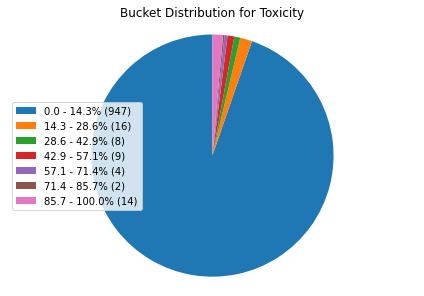

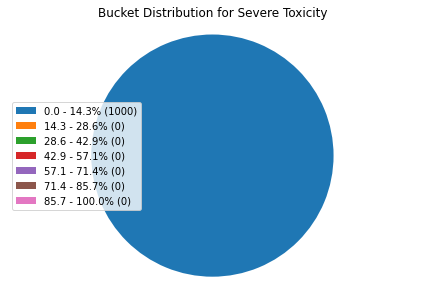

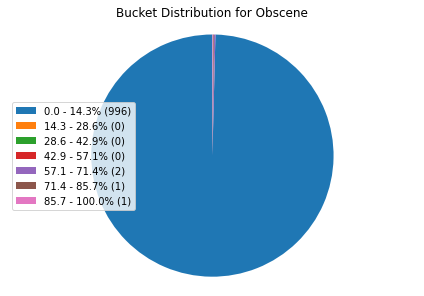

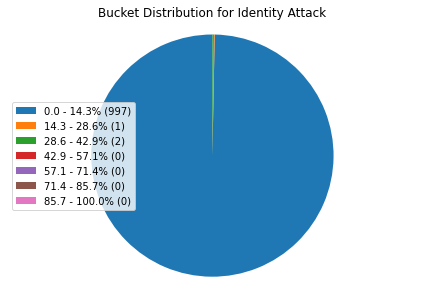

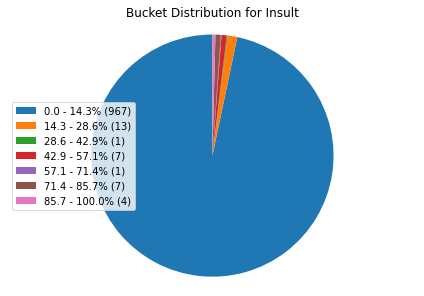

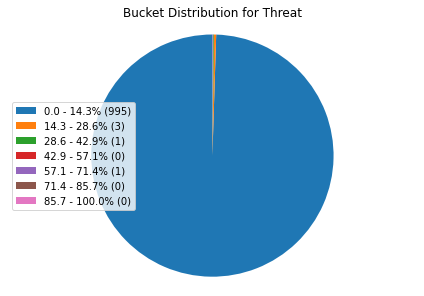

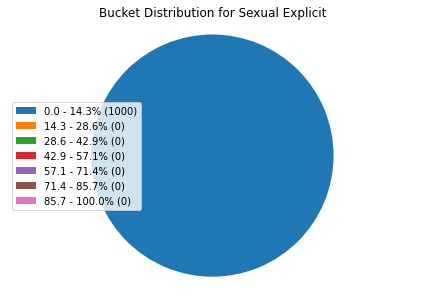

In [9]:
plot_pie_chart('Toxicity', toxicity)
plot_pie_chart('Severe Toxicity', severe_toxicity)
plot_pie_chart('Obscene', obscene)
plot_pie_chart('Identity Attack', identity_attack)
plot_pie_chart('Insult', insult)
plot_pie_chart('Threat', threat)
plot_pie_chart('Sexual Explicit', sexual_explicit)